# Baselines

Características:
* Rango de n-gramas: 3
* Frecuencia mínima de aparición: 3
* Conjunto de datos con preprocesamiento

## Imports

In [1]:
import sys
sys.path.append('../../../Scripts/')

In [2]:
import pandas as pd, numpy as np
import baseline_model as b
import plots as p
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

## Paths

In [4]:
main_path = '../Datasets/CSV/Clean/'

In [5]:
# English
data_training_en_path = f'{main_path}data_training_en.csv'
data_test_en_path = f'{main_path}data_test_en.csv'

# Spanish
data_training_es_path = f'{main_path}data_training_es.csv'
data_test_es_path = f'{main_path}data_test_en.csv'

## Data

In [6]:
# English
data_training_en = pd.read_csv(data_training_en_path).dropna()
data_test_en = pd.read_csv(data_test_en_path).dropna()

# Spanish
data_training_es = pd.read_csv(data_training_es_path).dropna()
data_test_es = pd.read_csv(data_test_es_path).dropna()

In [23]:
data_training_en[data_training_en.author != 1].gender.value_counts()

1    4805
0    4745
Name: gender, dtype: int64

In [37]:
data_training_en.author.value_counts()

0    9550
1    7682
Name: author, dtype: int64

In [7]:
# Cargar los datos de entrenamiento y prueba
train_data = pd.concat([data_training_en, data_training_es], axis=0)
test_data = pd.concat([data_test_en, data_test_es], axis=0)

## General params

In [24]:
seed = 42
target_names = ['human', 'bot']
gender_names = ['gender_1', 'gender_2']

## Logistic regression

In [33]:
# Defining model
lr = LogisticRegression(random_state = seed, penalty = 'l2', 
                        solver = 'liblinear', max_iter = 1000)

### Author

In [10]:
# English and Spanish
lr_author = b.Baseline(model=lr, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
lr_en_author = b.Baseline(model=lr, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
lr_es_author = b.Baseline(model=lr, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [11]:
lr_model_author, lr_vectorizer_author, lr_metrics_author = lr_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.69      0.89      0.78      6676
         bot       0.80      0.51      0.63      5596

    accuracy                           0.72     12272
   macro avg       0.74      0.70      0.70     12272
weighted avg       0.74      0.72      0.71     12272



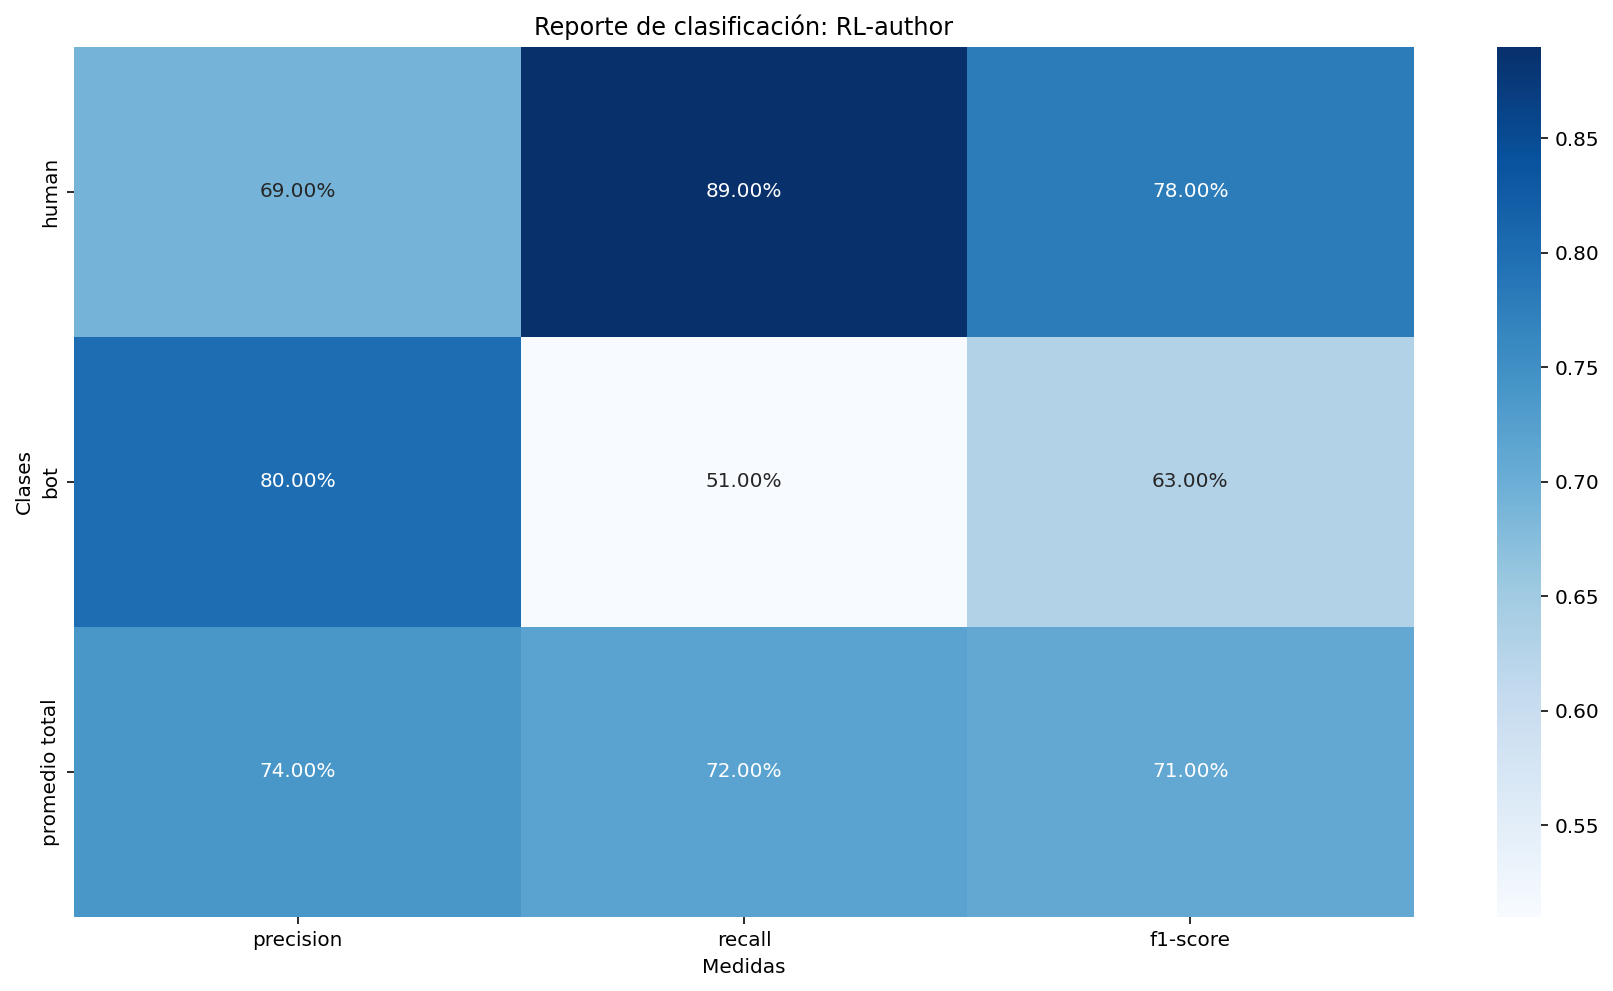

In [12]:
lr_author_plot = p.Plots(metrics= lr_metrics_author)
lr_author_plot.plot_classification_report(title='Reporte de clasificación: RL-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['human', 'bot', 'promedio total'], 
                                        with_avg_total=True)

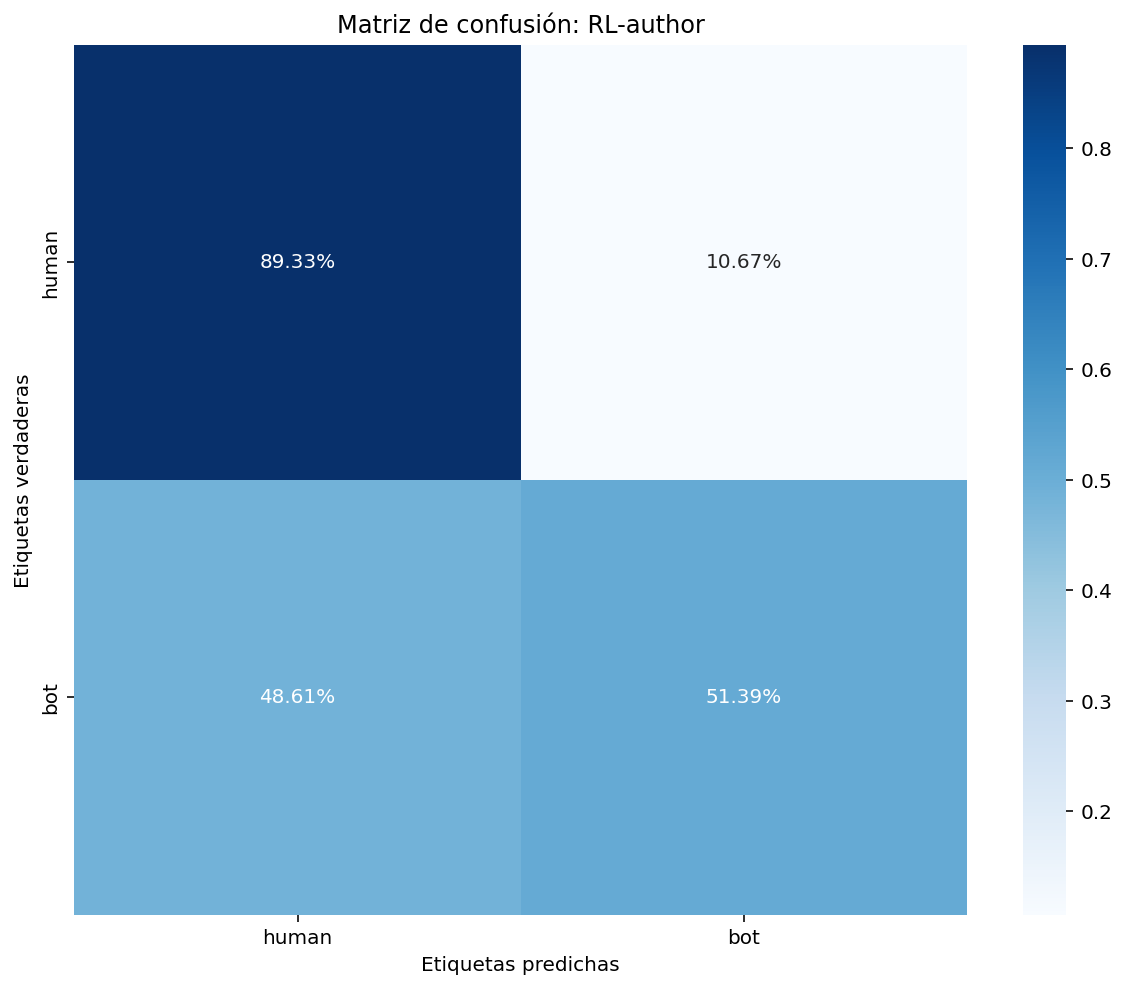

In [13]:
lr_author_plot.plot_confusion_matrix(title='Matriz de confusión: RL-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [14]:
lr_model_author_en, lr_vectorizer_author_en, lr_metrics_author_en = lr_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.68      0.93      0.79      3338
         bot       0.85      0.47      0.61      2798

    accuracy                           0.72      6136
   macro avg       0.77      0.70      0.70      6136
weighted avg       0.76      0.72      0.71      6136



In [15]:
lr_model_author_es, lr_vectorizer_author_es, lr_metrics_author_es = lr_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.60      0.85      0.70      3338
         bot       0.64      0.31      0.42      2798

    accuracy                           0.60      6136
   macro avg       0.62      0.58      0.56      6136
weighted avg       0.61      0.60      0.57      6136



### Gender

In [42]:
data_training_gender_en = data_training_en[data_training_en.author != 1]
data_test_gender_en = data_test_en[data_test_en.author != 1]

data_training_gender_es = data_training_es[data_training_es.author != 1]
data_test_gender_es = data_test_es[data_test_es.author != 1]

In [43]:
# English and Spanish
lr_gender = b.Baseline(model=lr, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# English
lr_en_gender = b.Baseline(model=lr, 
                train_data=data_training_gender_en, 
                test_data=data_test_gender_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
lr_es_gender = b.Baseline(model=lr, 
                train_data=data_training_gender_es, 
                test_data=data_test_gender_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [17]:
lr_model_gender, lr_vectorizer_gender, lr_metrics_gender = lr_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.22      0.39      0.28      1920
    gender_2       0.62      0.41      0.49      4756
         bot       0.67      0.69      0.68      5596

    accuracy                           0.53     12272
   macro avg       0.50      0.49      0.48     12272
weighted avg       0.58      0.53      0.54     12272



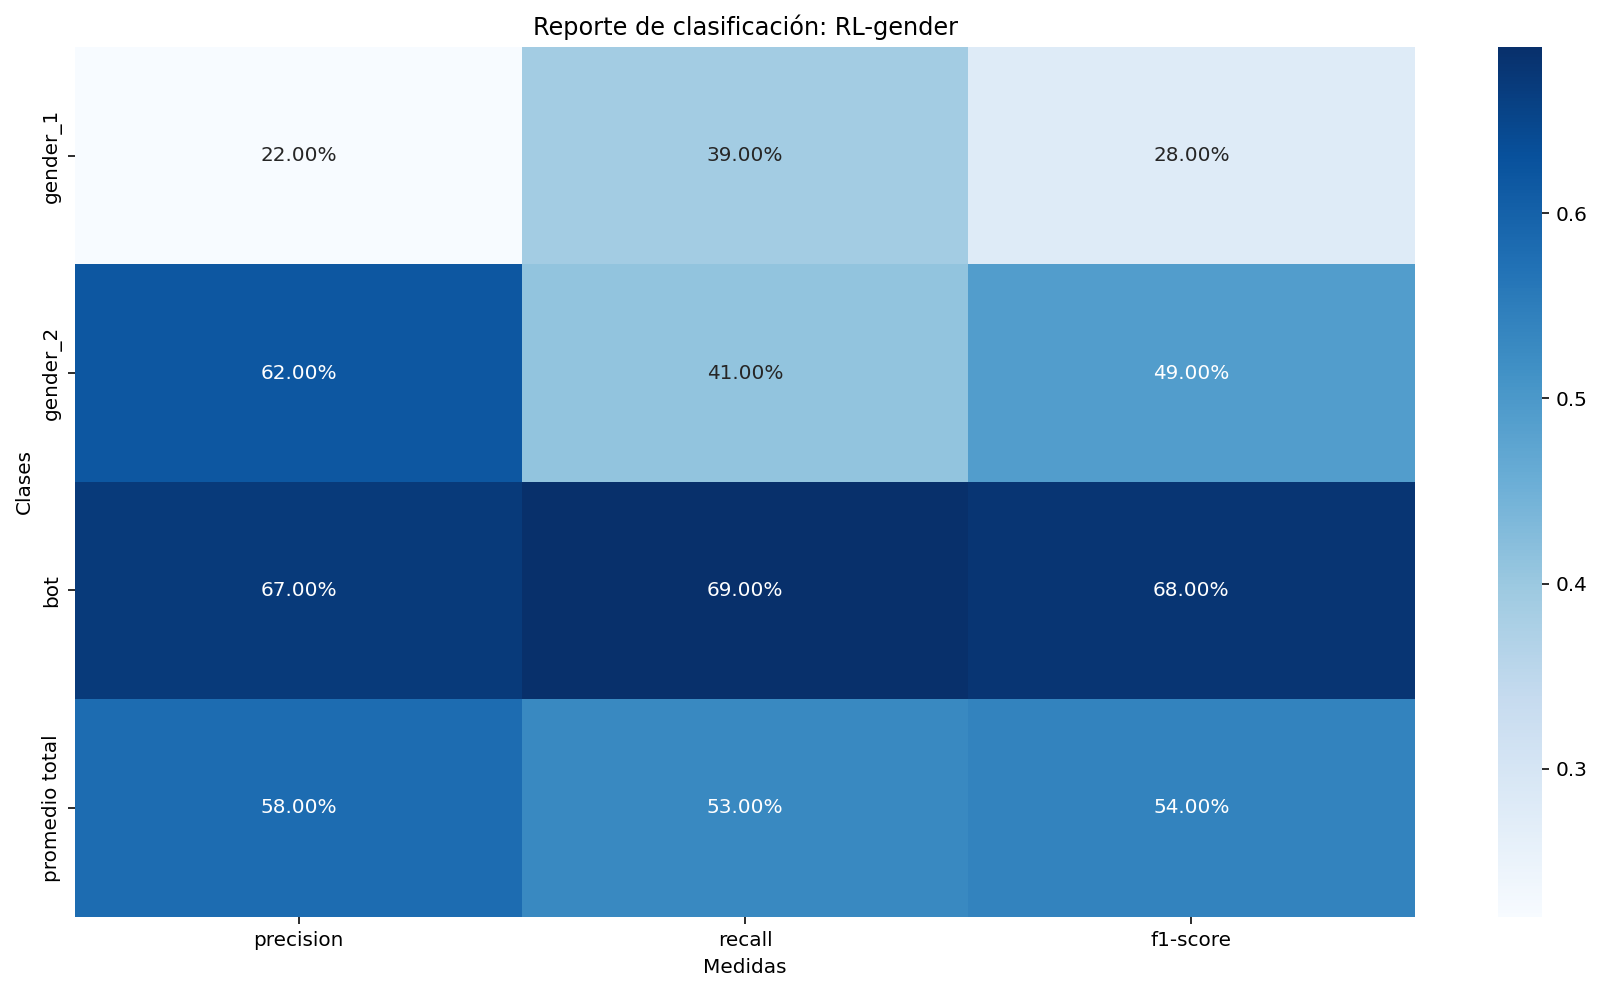

In [18]:
lr_gender_plot = p.Plots(metrics= lr_metrics_gender)
lr_gender_plot.plot_classification_report(title='Reporte de clasificación: RL-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

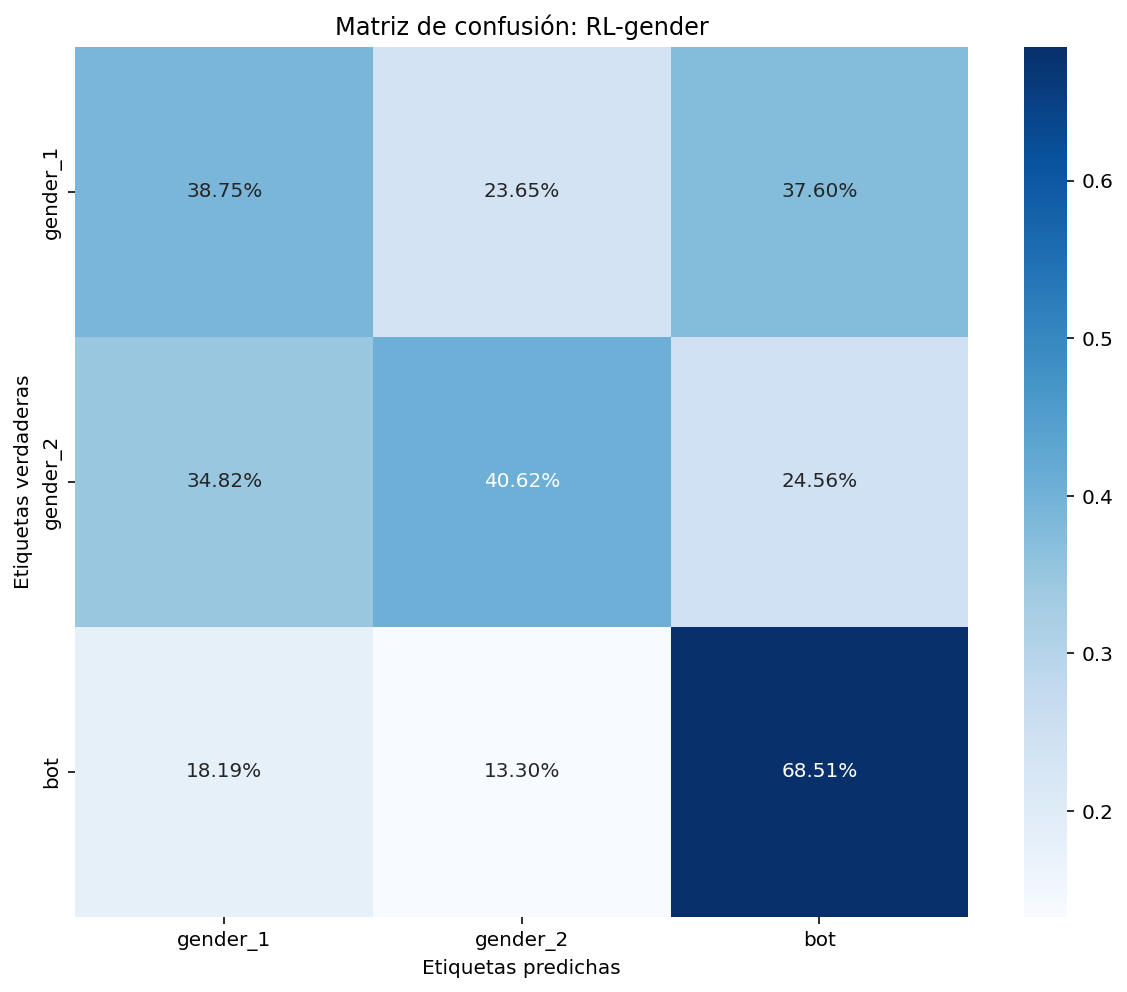

In [19]:
lr_gender_plot.plot_confusion_matrix(title='Matriz de confusión: RL-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [44]:
lr_model_gender_en, lr_vectorizer_gender_en, lr_metrics_gender_en = lr_en_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.31      0.53      0.39       960
    gender_2       0.73      0.52      0.61      2378

    accuracy                           0.52      3338
   macro avg       0.52      0.52      0.50      3338
weighted avg       0.61      0.52      0.54      3338



In [45]:
lr_model_gender_es, lr_vectorizer_gender_es, lr_metrics_gender_es = lr_es_gender.baseline()


Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.32      0.72      0.44       960
    gender_2       0.77      0.39      0.51      2378

    accuracy                           0.48      3338
   macro avg       0.55      0.55      0.48      3338
weighted avg       0.64      0.48      0.49      3338



## SVC

In [47]:
lsvc = SVC(kernel='linear', random_state = seed)

### Author

In [10]:
# English and Spanish
lsvc_author = b.Baseline(model=lsvc, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
lsvc_en_author = b.Baseline(model=lsvc, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
lsvc_es_author = b.Baseline(model=lsvc, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [11]:
lsvc_model_author, lsvc_vectorizer_author, lsvc_metrics_author = lsvc_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.69      0.89      0.78      6676
         bot       0.80      0.52      0.63      5596

    accuracy                           0.72     12272
   macro avg       0.74      0.71      0.70     12272
weighted avg       0.74      0.72      0.71     12272



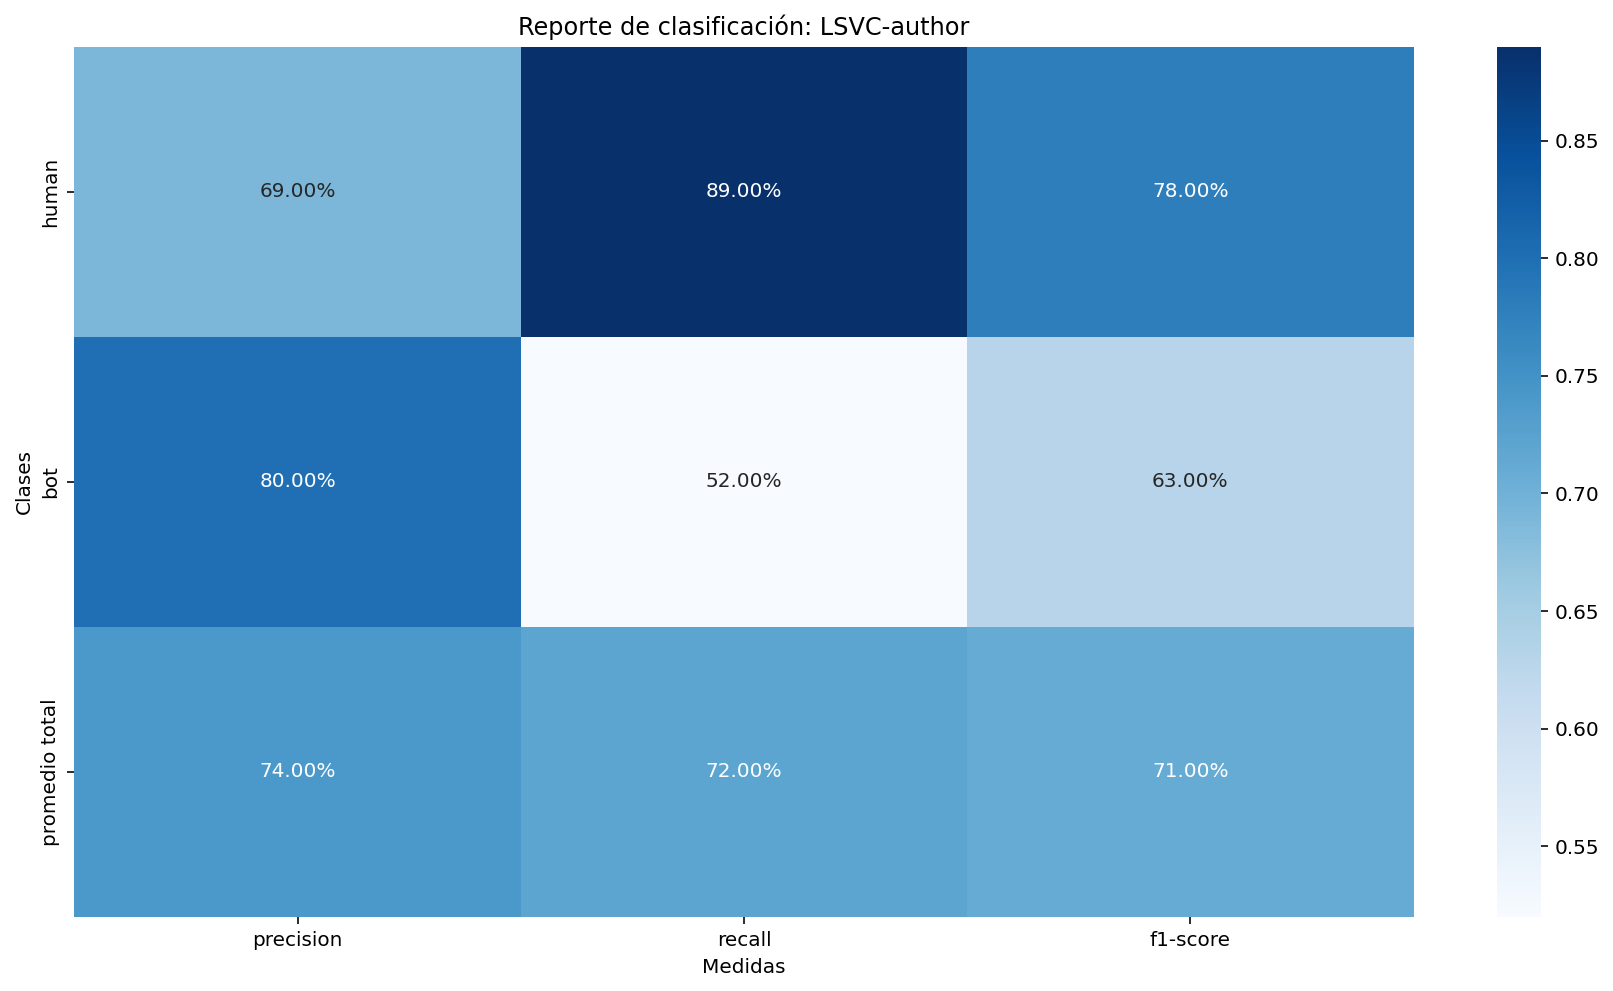

In [12]:
lsvc_author_plot = p.Plots(metrics= lsvc_metrics_author)
lsvc_author_plot.plot_classification_report(title='Reporte de clasificación: LSVC-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['human', 'bot', 'promedio total'], 
                                        with_avg_total=True)

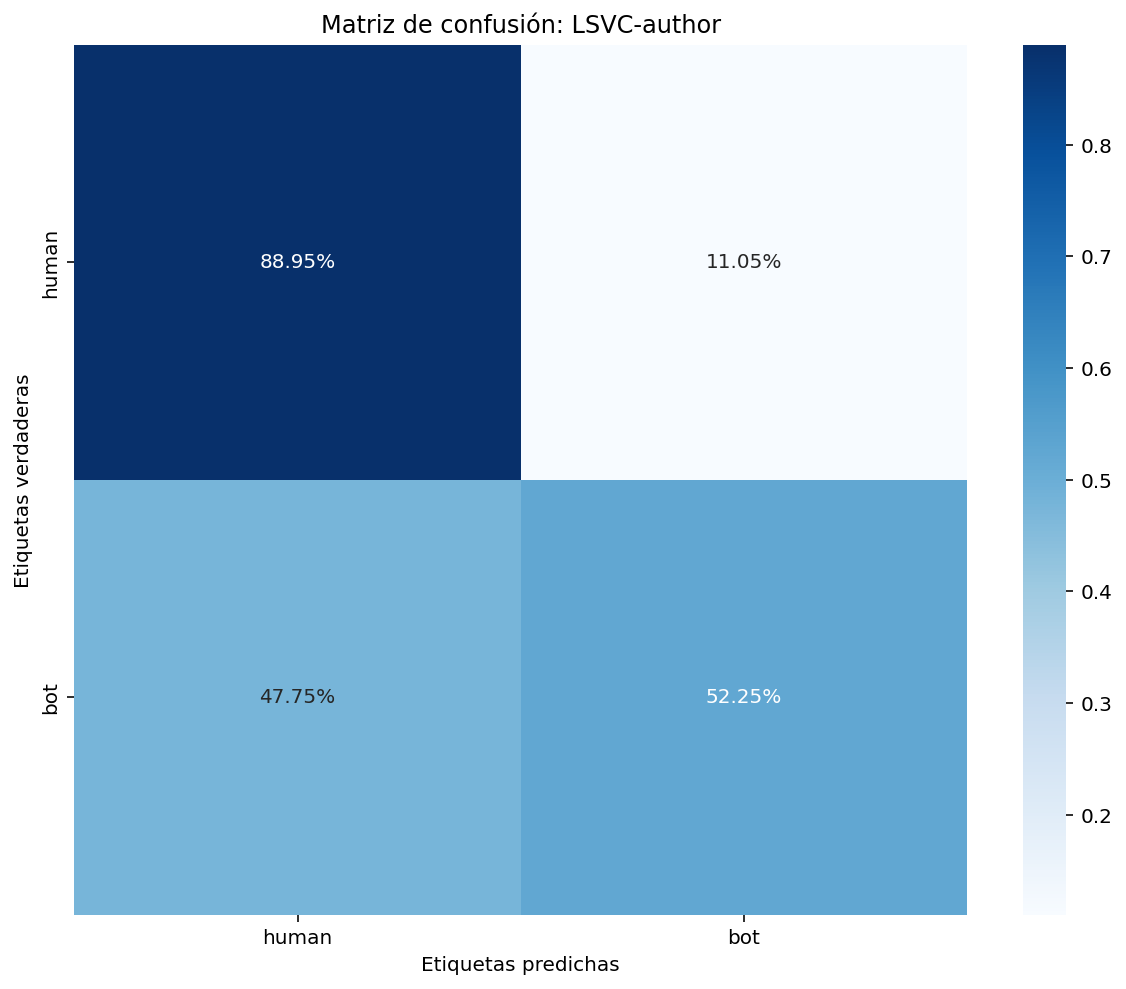

In [13]:
lsvc_author_plot.plot_confusion_matrix(title='Matriz de confusión: LSVC-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [14]:
lsvc_model_author_en, lsvc_vectorizer_author_en, lsvc_metrics_author_en = lsvc_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.69      0.91      0.78      3338
         bot       0.83      0.50      0.63      2798

    accuracy                           0.73      6136
   macro avg       0.76      0.71      0.71      6136
weighted avg       0.75      0.73      0.71      6136



In [15]:
lsvc_model_author_es, lsvc_vectorizer_author_es, lsvc_metrics_author_es = lsvc_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.59      0.87      0.71      3338
         bot       0.65      0.29      0.40      2798

    accuracy                           0.61      6136
   macro avg       0.62      0.58      0.55      6136
weighted avg       0.62      0.61      0.57      6136



### Gender

In [48]:
# English and Spanish
lsvc_gender = b.Baseline(model=lsvc, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# English
lsvc_en_gender = b.Baseline(model=lsvc, 
                train_data=data_training_gender_en, 
                test_data=data_test_gender_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
lsvc_es_gender = b.Baseline(model=lsvc, 
                train_data=data_training_gender_es, 
                test_data=data_test_gender_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [17]:
lsvc_model_gender, lsvc_vectorizer_gender, lsvc_metrics_gender = lsvc_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.22      0.44      0.29      1920
    gender_2       0.59      0.45      0.51      4756
         bot       0.74      0.63      0.68      5596

    accuracy                           0.53     12272
   macro avg       0.52      0.51      0.49     12272
weighted avg       0.60      0.53      0.55     12272



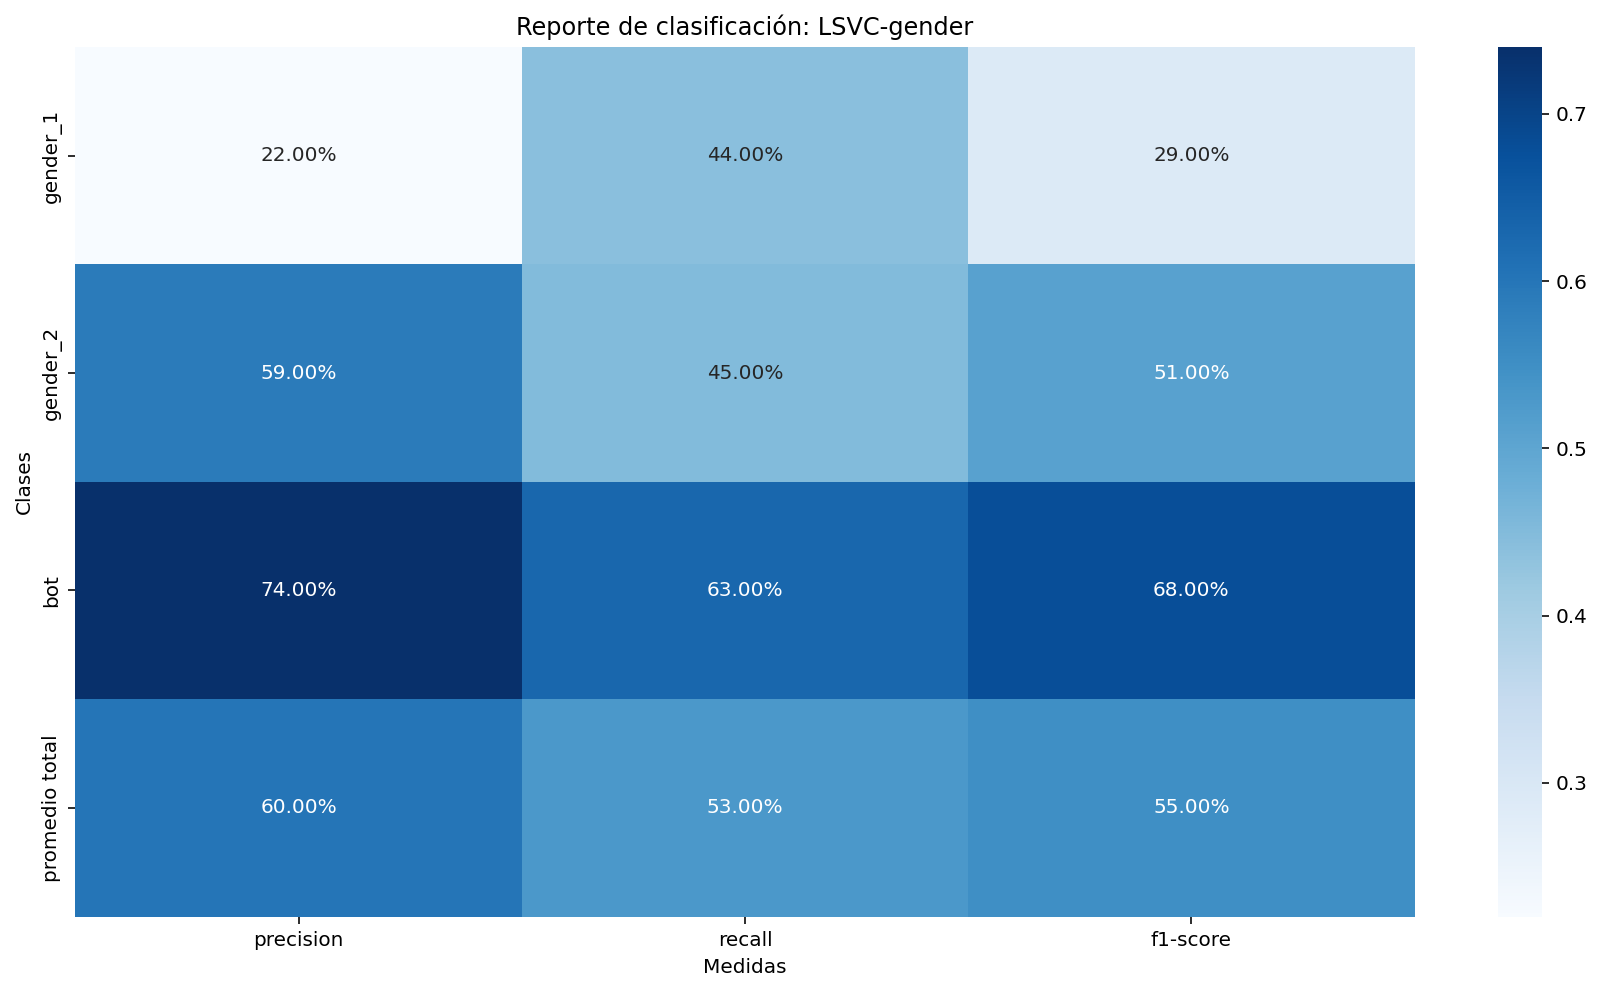

In [18]:
lsvc_gender_plot = p.Plots(metrics=lsvc_metrics_gender)
lsvc_gender_plot.plot_classification_report(title='Reporte de clasificación: LSVC-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

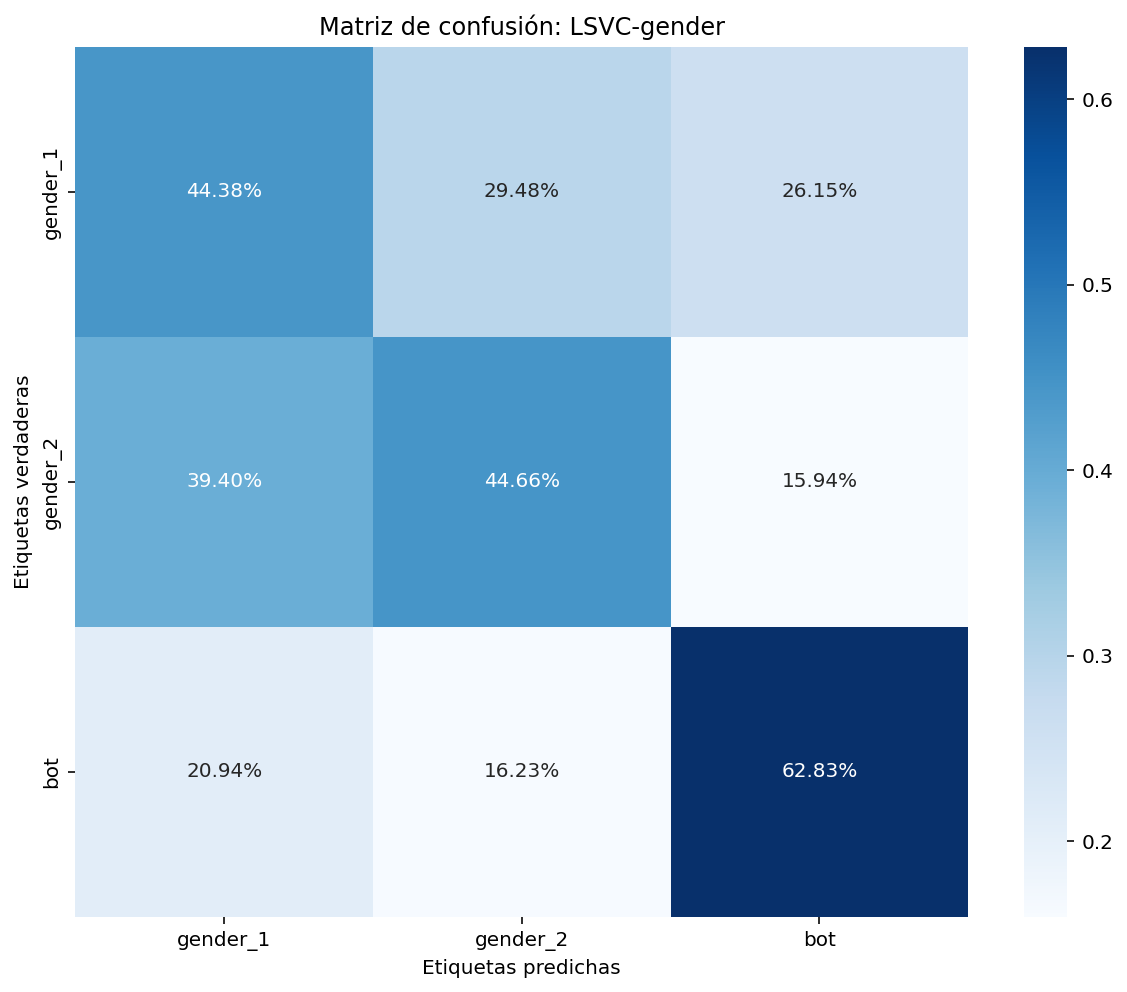

In [19]:
lsvc_gender_plot.plot_confusion_matrix(title='Matriz de confusión: LSVC-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [49]:
lsvc_model_gender_en, lsvc_vectorizer_gender_en, lsvc_metrics_gender_en = lsvc_en_gender.baseline()


Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.31      0.53      0.39       960
    gender_2       0.73      0.52      0.61      2378

    accuracy                           0.52      3338
   macro avg       0.52      0.53      0.50      3338
weighted avg       0.61      0.52      0.55      3338



In [55]:
lsvc_model_gender_es, lsvc_vectorizer_gender_es, lsvc_metrics_gender_es = lsvc_es_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.32      0.65      0.43       960
    gender_2       0.76      0.44      0.55      2378

    accuracy                           0.50      3338
   macro avg       0.54      0.54      0.49      3338
weighted avg       0.63      0.50      0.52      3338



## Random forest

In [51]:
rf = RandomForestClassifier(max_depth = 100, random_state = seed)

### Author

In [36]:
# English and Spanish
rf_author = b.Baseline(model=rf, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
rf_en_author = b.Baseline(model=rf, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
rf_es_author = b.Baseline(model=rf, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [37]:
rf_model_author, rf_vectorizer_author, rf_metrics_author = rf_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.62      0.99      0.77      6676
         bot       0.97      0.29      0.44      5596

    accuracy                           0.67     12272
   macro avg       0.80      0.64      0.60     12272
weighted avg       0.78      0.67      0.62     12272



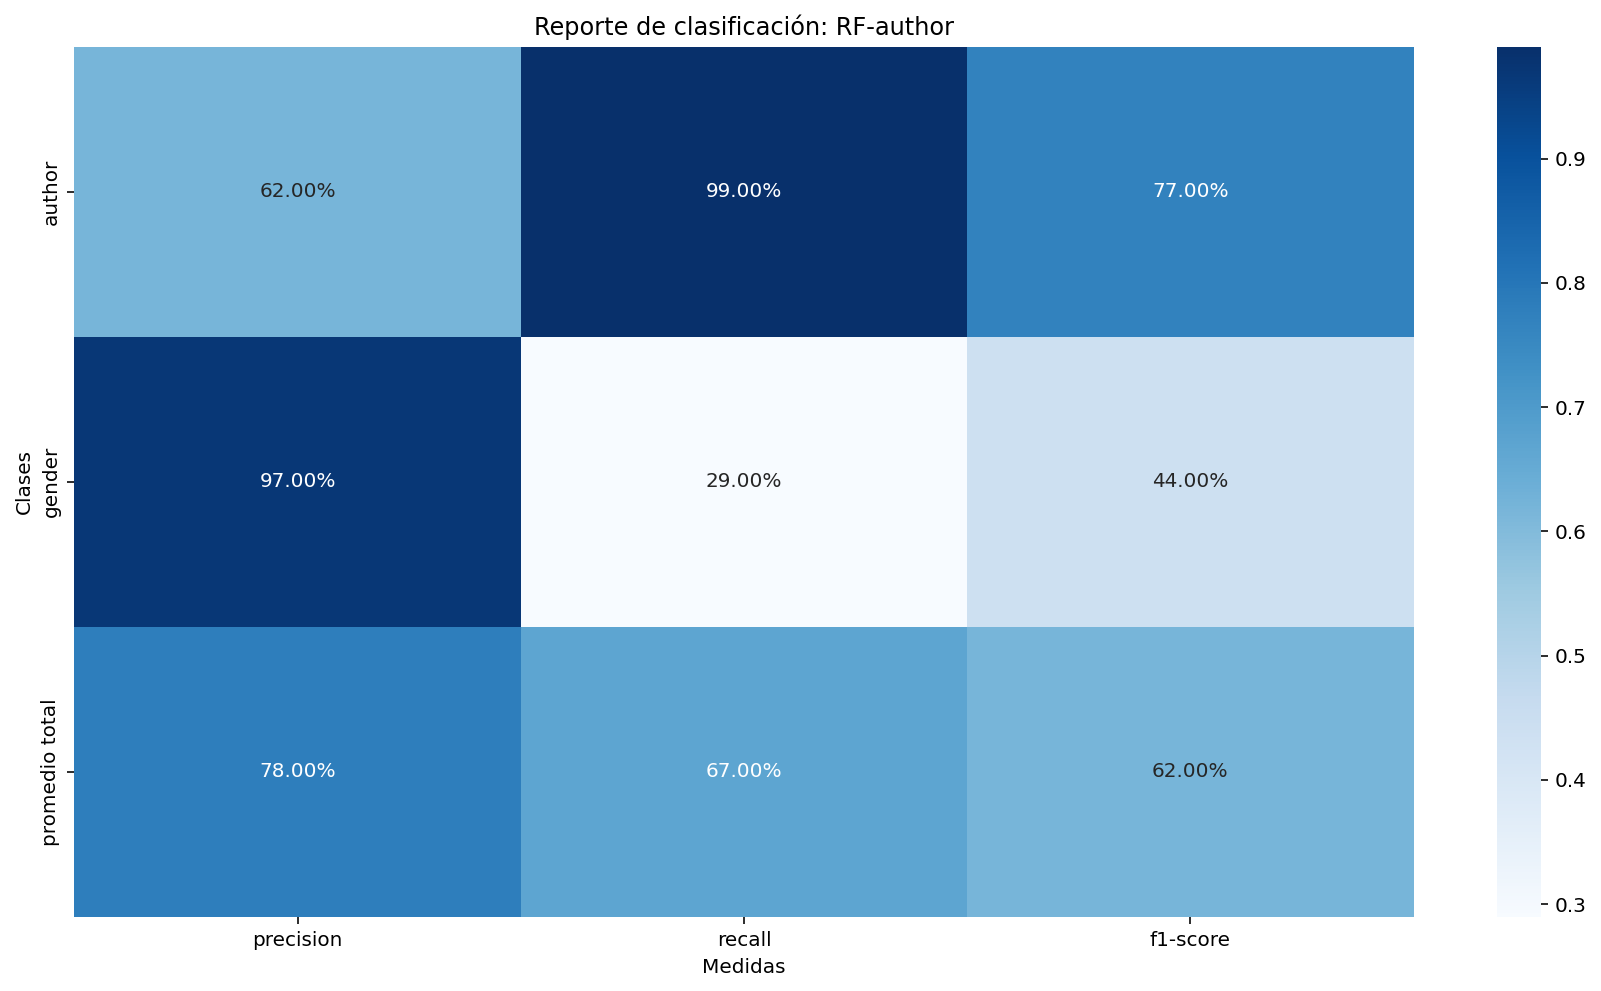

In [44]:
rf_author_plot = p.Plots(metrics=rf_metrics_author)
rf_author_plot.plot_classification_report(title='Reporte de clasificación: RF-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['author', 'gender', 'promedio total'], 
                                        with_avg_total=True)

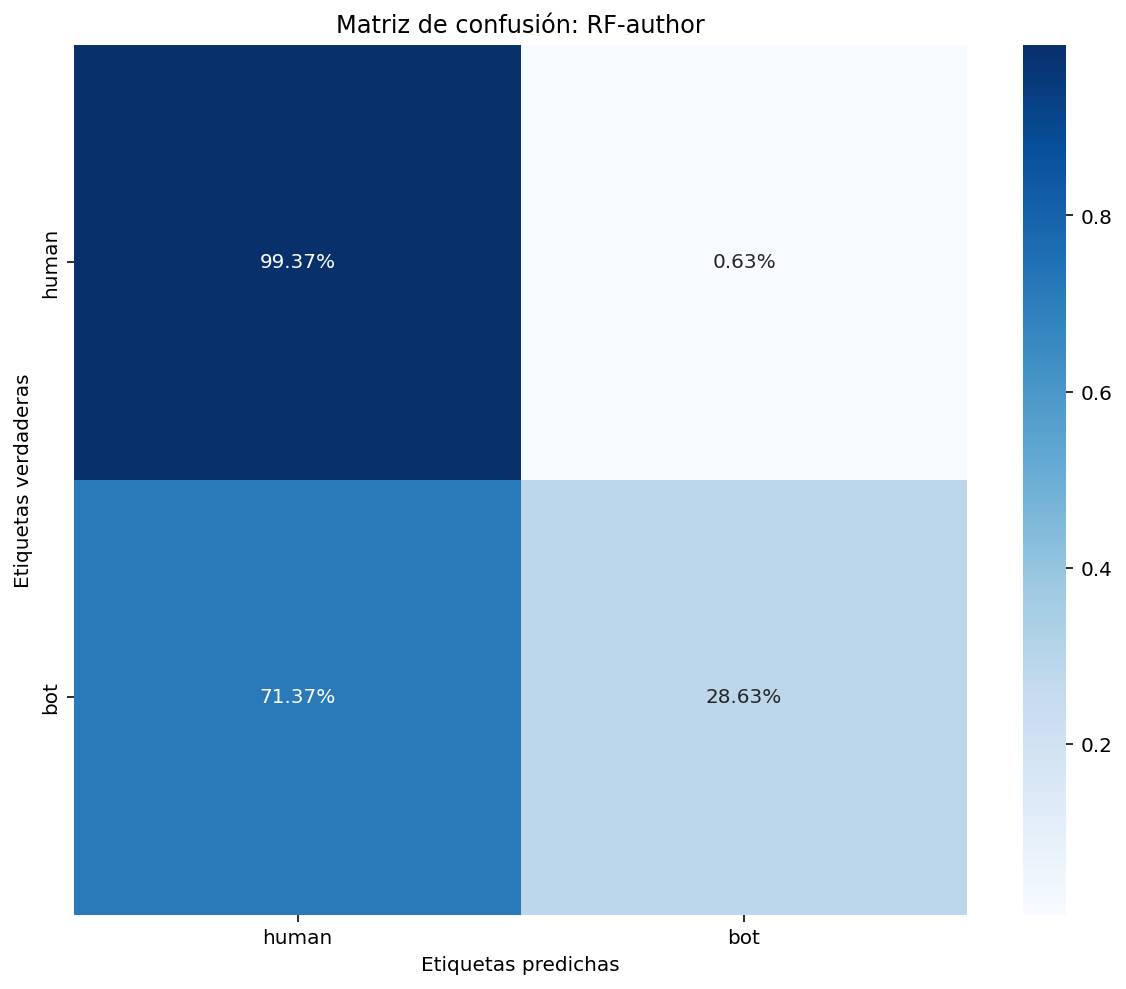

In [45]:
rf_author_plot.plot_confusion_matrix(title='Matriz de confusión: RF-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [38]:
rf_model_author_en, rf_vectorizer_author_en, rf_metrics_author_en = rf_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.63      0.99      0.77      3338
         bot       0.98      0.32      0.48      2798

    accuracy                           0.69      6136
   macro avg       0.81      0.66      0.63      6136
weighted avg       0.79      0.69      0.64      6136



In [39]:
rf_model_author_es, rf_vectorizer_author_es, rf_metrics_author_es = rf_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.56      0.94      0.70      3338
         bot       0.61      0.11      0.19      2798

    accuracy                           0.56      6136
   macro avg       0.58      0.53      0.44      6136
weighted avg       0.58      0.56      0.47      6136



### Gender

In [52]:
# English and Spanish
rf_gender = b.Baseline(model=rf, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# English
rf_en_gender = b.Baseline(model=rf, 
                train_data=data_training_gender_en, 
                test_data=data_test_gender_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
rf_es_gender = b.Baseline(model=rf, 
                train_data=data_training_gender_es, 
                test_data=data_test_gender_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [41]:
rf_model_gender, rf_vectorizer_gender, rf_metrics_gender = rf_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.21      0.08      0.12      1920
    gender_2       0.70      0.10      0.18      4756
         bot       0.49      0.96      0.65      5596

    accuracy                           0.49     12272
   macro avg       0.47      0.38      0.32     12272
weighted avg       0.53      0.49      0.38     12272



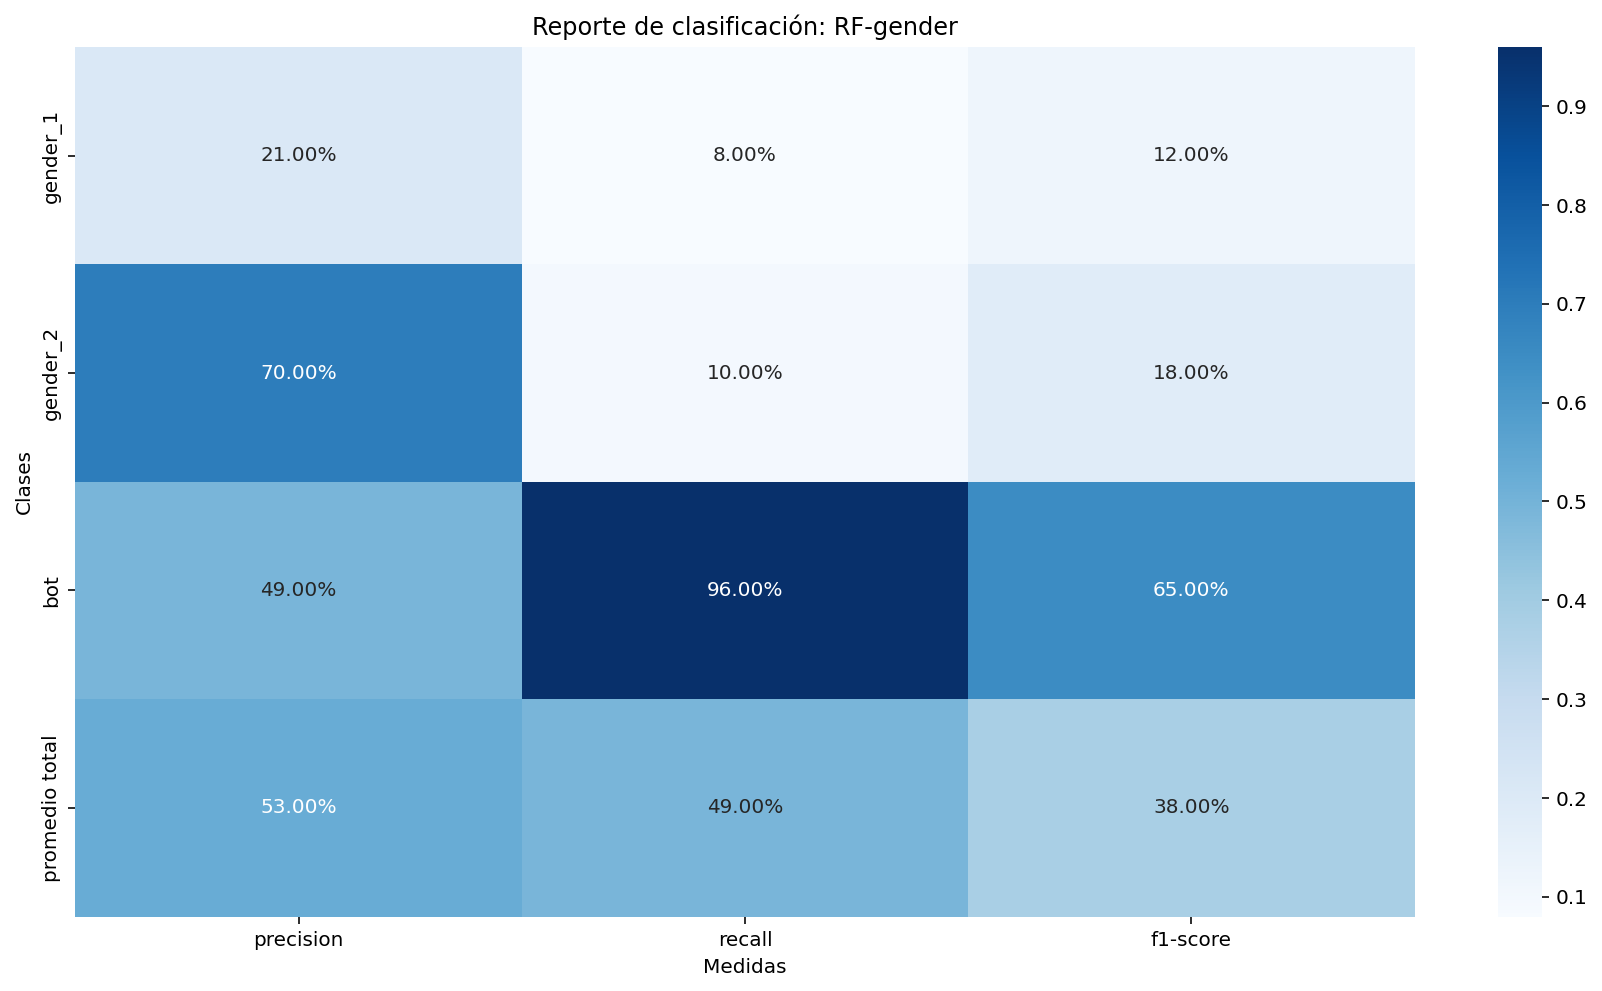

In [46]:
rf_gender_plot = p.Plots(metrics=rf_metrics_gender)
rf_gender_plot.plot_classification_report(title='Reporte de clasificación: RF-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

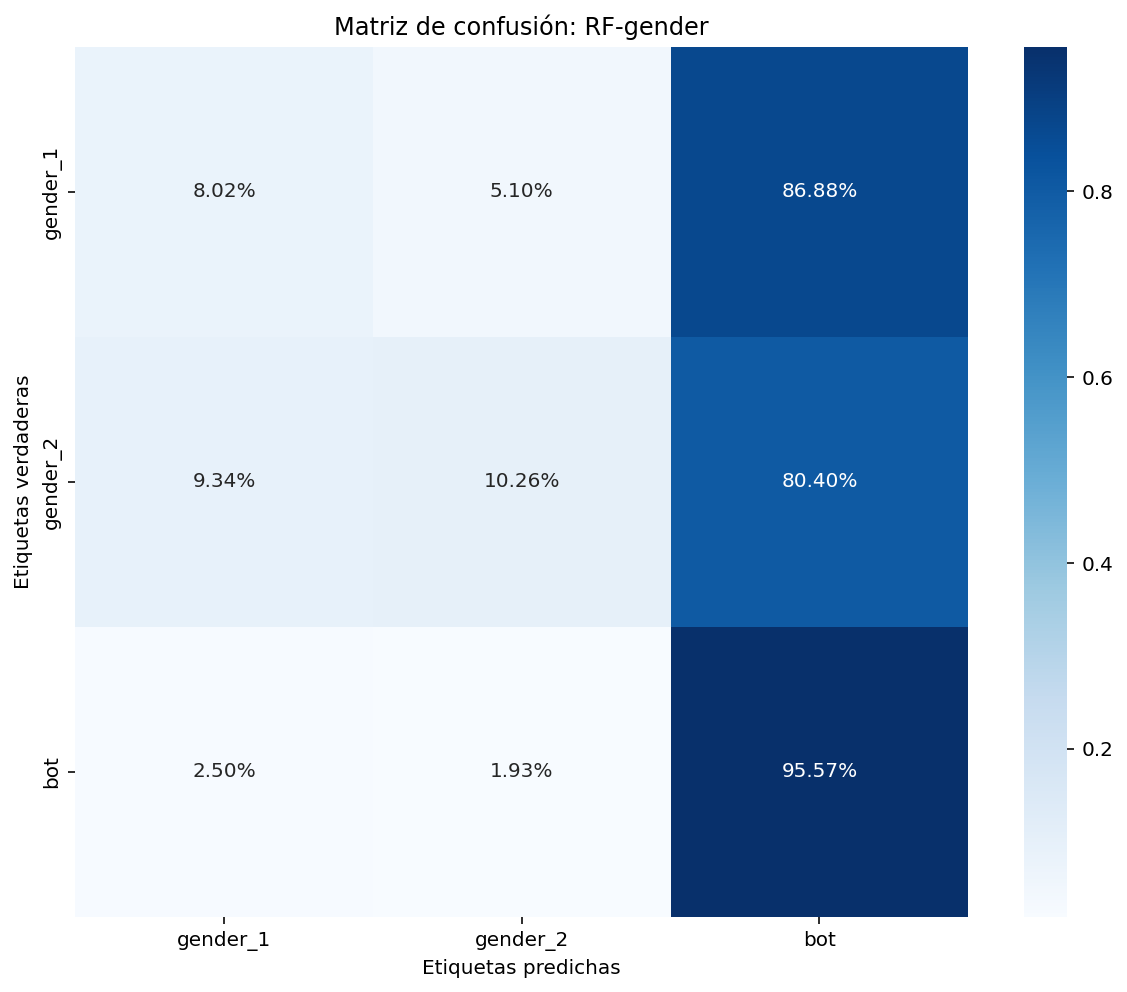

In [47]:
rf_gender_plot.plot_confusion_matrix(title='Matriz de confusión: RF-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [53]:
rf_model_gender_en, rf_vectorizer_gender_en, rf_metrics_gender_en = rf_en_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.29      0.51      0.37       960
    gender_2       0.71      0.48      0.57      2378

    accuracy                           0.49      3338
   macro avg       0.50      0.50      0.47      3338
weighted avg       0.59      0.49      0.51      3338



In [54]:
rf_model_gender_es, rf_vectorizer_gender_es, rf_metrics_gender_es = rf_es_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.31      0.85      0.45       960
    gender_2       0.78      0.22      0.34      2378

    accuracy                           0.40      3338
   macro avg       0.55      0.54      0.40      3338
weighted avg       0.65      0.40      0.37      3338

